# H4S 1


Zero-Crossing Analysis Results:
   Zero Crossings  Avg Zero-Crossing Interval (s)  \
0              19                        2.003389   

   Estimated Breathing Rate (BPM)  
0                       14.974626  
Breathing Rate from Peak Detection: 18.60 BPM


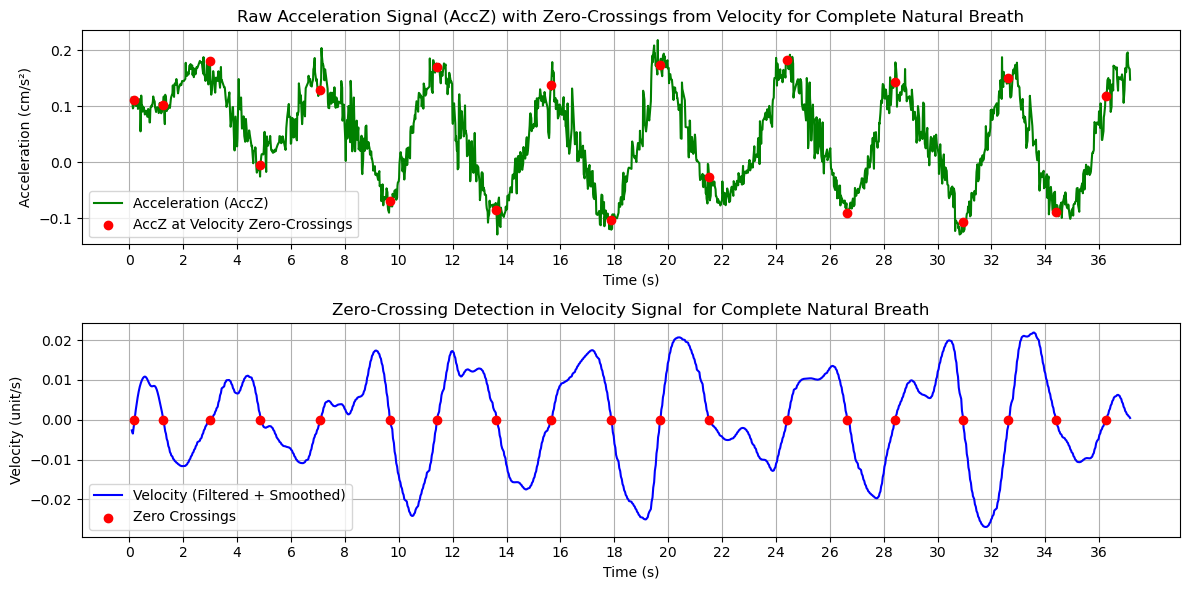

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
file_path = "chest_motion_data_ble_timer_01(heavy_4_second).csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract time and AccZ acceleration
time = df["Timestamp_sec"].values
acceleration = df["AccZ"].values  # Use only AccZ

# Calculate time step (assumes uniform sampling)
dt = np.mean(np.diff(time))

# High-Pass Filter Function (removes drift)
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-Pass Filter Function (removes fast noise)
def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Moving Average Filter (stronger smoothing)
def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Compute velocity using cumulative sum and apply filters
velocity = np.cumsum(acceleration) * dt
velocity = highpass_filter(velocity, cutoff=0.3, fs=50)  
velocity = lowpass_filter(velocity, cutoff=2.2, fs=50)   
velocity = moving_average(velocity, window_size=7)       

# Find zero crossings in velocity
sign_changes = np.diff(np.sign(velocity))
valid_zero_crossings = np.where(sign_changes != 0)[0]
zero_crossing_times = time[valid_zero_crossings]

# Ignore zero crossings that occur within 1.0 seconds
filtered_zero_crossing_times = [zero_crossing_times[0]]
for i in range(1, len(zero_crossing_times)):
    if zero_crossing_times[i] - filtered_zero_crossing_times[-1] > 1.0:
        filtered_zero_crossing_times.append(zero_crossing_times[i])
filtered_zero_crossing_times = np.array(filtered_zero_crossing_times)

# Interpolate AccZ values at the time of zero crossings
acc_at_zero_crossings = np.interp(filtered_zero_crossing_times, time, acceleration)

# Compute time intervals between zero crossings
time_intervals = np.diff(filtered_zero_crossing_times)

# Estimate breathing rate
if len(time_intervals) > 1:
    avg_zero_crossing_time = np.mean(time_intervals)
    breathing_rate = 60 / (2 * avg_zero_crossing_time)  
else:
    avg_zero_crossing_time = np.nan
    breathing_rate = np.nan

# Store results
results = {
    "Zero Crossings": len(filtered_zero_crossing_times),
    "Avg Zero-Crossing Interval (s)": avg_zero_crossing_time,
    "Estimated Breathing Rate (BPM)": breathing_rate,
}

# Display results
print("\nZero-Crossing Analysis Results:")
print(pd.DataFrame([results]))

# Peak Detection Method
peaks, _ = find_peaks(velocity, distance=50, height=np.std(velocity))
peak_times = time[peaks]
breathing_rate_peaks = 60 / np.median(np.diff(peak_times)) if len(peak_times) > 1 else np.nan
print(f"Breathing Rate from Peak Detection: {breathing_rate_peaks:.2f} BPM")

# Plot acceleration and velocity
plt.figure(figsize=(12, 6))

# Plot raw acceleration with zero-crossings marked
plt.subplot(2, 1, 1)
plt.plot(time, acceleration, label="Acceleration (AccZ)", color="green")
plt.scatter(filtered_zero_crossing_times, acc_at_zero_crossings, color="red", label="AccZ at Velocity Zero-Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.title("Raw Acceleration Signal (AccZ) with Zero-Crossings from Velocity for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

# Plot velocity with zero-crossings marked
plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (Filtered + Smoothed)", color="blue")
plt.scatter(filtered_zero_crossing_times, np.zeros_like(filtered_zero_crossing_times), color="red", label="Zero Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.title("Zero-Crossing Detection in Velocity Signal  for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

plt.tight_layout()
plt.show()


In [2]:
print(filtered_zero_crossing_times)

[ 0.186  1.251  2.98   4.867  7.087  9.667 11.407 13.626 15.64  17.874
 19.687 21.52  24.414 26.634 28.42  30.94  32.633 34.387 36.247]


# H4S 2


Zero-Crossing Analysis Results:
   Zero Crossings  Avg Zero-Crossing Interval (s)  \
0              14                        1.918846   

   Estimated Breathing Rate (BPM)  
0                       15.634396  
Breathing Rate from Peak Detection: 15.38 BPM


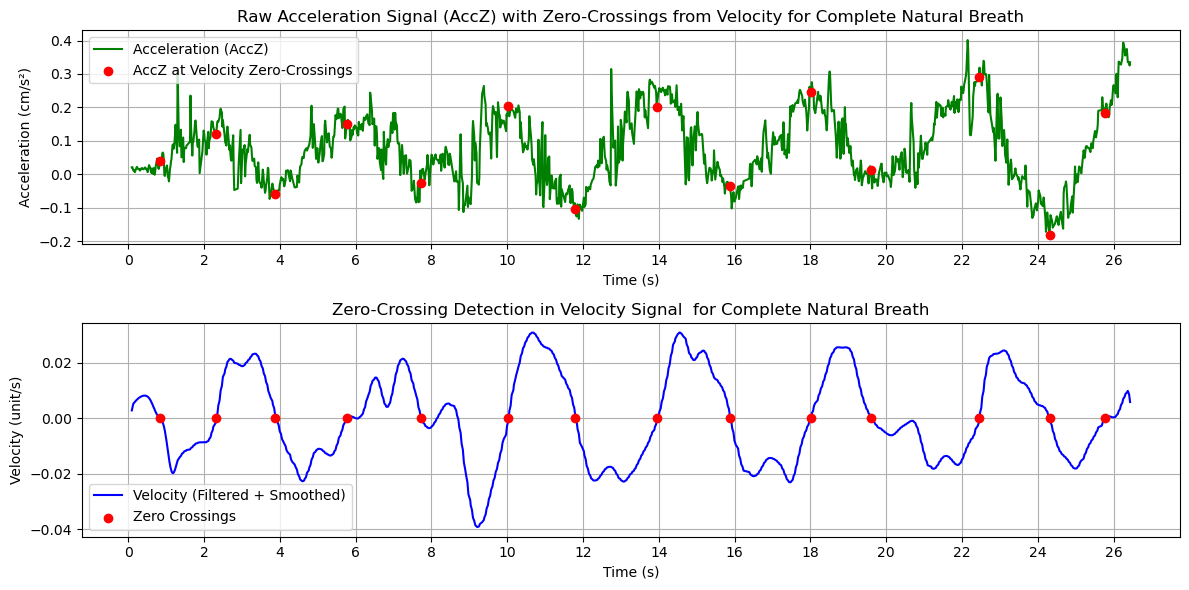

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
file_path = "chest_motion_data_ble_timer_02(heavy_4_second).csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract time and AccZ acceleration
time = df["Timestamp_sec"].values
acceleration = df["AccZ"].values  # Use only AccZ

# Calculate time step (assumes uniform sampling)
dt = np.mean(np.diff(time))

# High-Pass Filter Function (removes drift)
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-Pass Filter Function (removes fast noise)
def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Moving Average Filter (stronger smoothing)
def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Compute velocity using cumulative sum and apply filters
velocity = np.cumsum(acceleration) * dt
velocity = highpass_filter(velocity, cutoff=0.3, fs=50)  
velocity = lowpass_filter(velocity, cutoff=2.2, fs=50)   
velocity = moving_average(velocity, window_size=7)       

# Find zero crossings in velocity
sign_changes = np.diff(np.sign(velocity))
valid_zero_crossings = np.where(sign_changes != 0)[0]
zero_crossing_times = time[valid_zero_crossings]

# Ignore zero crossings that occur within 1.0 seconds
filtered_zero_crossing_times = [zero_crossing_times[0]]
for i in range(1, len(zero_crossing_times)):
    if zero_crossing_times[i] - filtered_zero_crossing_times[-1] > 1.0:
        filtered_zero_crossing_times.append(zero_crossing_times[i])
filtered_zero_crossing_times = np.array(filtered_zero_crossing_times)

# Interpolate AccZ values at the time of zero crossings
acc_at_zero_crossings = np.interp(filtered_zero_crossing_times, time, acceleration)

# Compute time intervals between zero crossings
time_intervals = np.diff(filtered_zero_crossing_times)

# Estimate breathing rate
if len(time_intervals) > 1:
    avg_zero_crossing_time = np.mean(time_intervals)
    breathing_rate = 60 / (2 * avg_zero_crossing_time)  
else:
    avg_zero_crossing_time = np.nan
    breathing_rate = np.nan

# Store results
results = {
    "Zero Crossings": len(filtered_zero_crossing_times),
    "Avg Zero-Crossing Interval (s)": avg_zero_crossing_time,
    "Estimated Breathing Rate (BPM)": breathing_rate,
}

# Display results
print("\nZero-Crossing Analysis Results:")
print(pd.DataFrame([results]))

# Peak Detection Method
peaks, _ = find_peaks(velocity, distance=50, height=np.std(velocity))
peak_times = time[peaks]
breathing_rate_peaks = 60 / np.median(np.diff(peak_times)) if len(peak_times) > 1 else np.nan
print(f"Breathing Rate from Peak Detection: {breathing_rate_peaks:.2f} BPM")

# Plot acceleration and velocity
plt.figure(figsize=(12, 6))

# Plot raw acceleration with zero-crossings marked
plt.subplot(2, 1, 1)
plt.plot(time, acceleration, label="Acceleration (AccZ)", color="green")
plt.scatter(filtered_zero_crossing_times, acc_at_zero_crossings, color="red", label="AccZ at Velocity Zero-Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.title("Raw Acceleration Signal (AccZ) with Zero-Crossings from Velocity for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

# Plot velocity with zero-crossings marked
plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (Filtered + Smoothed)", color="blue")
plt.scatter(filtered_zero_crossing_times, np.zeros_like(filtered_zero_crossing_times), color="red", label="Zero Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.title("Zero-Crossing Detection in Velocity Signal  for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

plt.tight_layout()
plt.show()


In [4]:
print(filtered_zero_crossing_times)

[ 0.83   2.315  3.875  5.768  7.715 10.028 11.795 13.942 15.875 18.009
 19.595 22.449 24.309 25.775]


# H4S 3


Zero-Crossing Analysis Results:
   Zero Crossings  Avg Zero-Crossing Interval (s)  \
0              19                        1.789111   

   Estimated Breathing Rate (BPM)  
0                       16.768103  
Breathing Rate from Peak Detection: 16.48 BPM


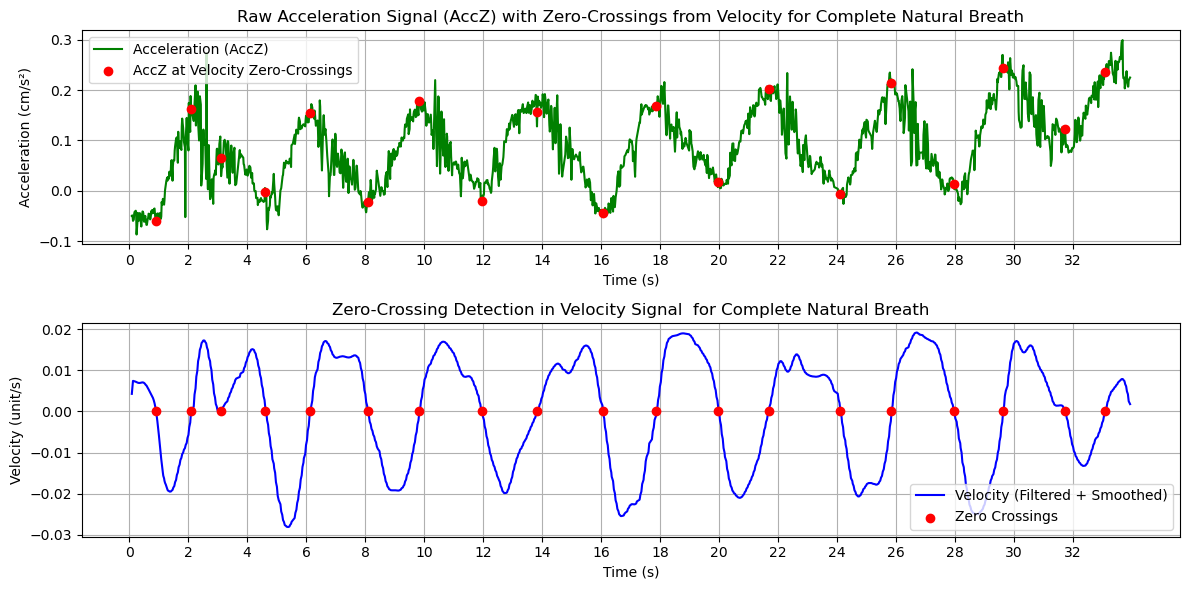

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
file_path = "chest_motion_data_ble_timer_03(heavy_4_second).csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract time and AccZ acceleration
time = df["Timestamp_sec"].values
acceleration = df["AccZ"].values  # Use only AccZ

# Calculate time step (assumes uniform sampling)
dt = np.mean(np.diff(time))

# High-Pass Filter Function (removes drift)
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-Pass Filter Function (removes fast noise)
def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Moving Average Filter (stronger smoothing)
def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Compute velocity using cumulative sum and apply filters
velocity = np.cumsum(acceleration) * dt
velocity = highpass_filter(velocity, cutoff=0.3, fs=50)  
velocity = lowpass_filter(velocity, cutoff=2.2, fs=50)   
velocity = moving_average(velocity, window_size=7)       

# Find zero crossings in velocity
sign_changes = np.diff(np.sign(velocity))
valid_zero_crossings = np.where(sign_changes != 0)[0]
zero_crossing_times = time[valid_zero_crossings]

# Ignore zero crossings that occur within 1.0 seconds
filtered_zero_crossing_times = [zero_crossing_times[0]]
for i in range(1, len(zero_crossing_times)):
    if zero_crossing_times[i] - filtered_zero_crossing_times[-1] > 1.0:
        filtered_zero_crossing_times.append(zero_crossing_times[i])
filtered_zero_crossing_times = np.array(filtered_zero_crossing_times)

# Interpolate AccZ values at the time of zero crossings
acc_at_zero_crossings = np.interp(filtered_zero_crossing_times, time, acceleration)

# Compute time intervals between zero crossings
time_intervals = np.diff(filtered_zero_crossing_times)

# Estimate breathing rate
if len(time_intervals) > 1:
    avg_zero_crossing_time = np.mean(time_intervals)
    breathing_rate = 60 / (2 * avg_zero_crossing_time)  
else:
    avg_zero_crossing_time = np.nan
    breathing_rate = np.nan

# Store results
results = {
    "Zero Crossings": len(filtered_zero_crossing_times),
    "Avg Zero-Crossing Interval (s)": avg_zero_crossing_time,
    "Estimated Breathing Rate (BPM)": breathing_rate,
}

# Display results
print("\nZero-Crossing Analysis Results:")
print(pd.DataFrame([results]))

# Peak Detection Method
peaks, _ = find_peaks(velocity, distance=50, height=np.std(velocity))
peak_times = time[peaks]
breathing_rate_peaks = 60 / np.median(np.diff(peak_times)) if len(peak_times) > 1 else np.nan
print(f"Breathing Rate from Peak Detection: {breathing_rate_peaks:.2f} BPM")

# Plot acceleration and velocity
plt.figure(figsize=(12, 6))

# Plot raw acceleration with zero-crossings marked
plt.subplot(2, 1, 1)
plt.plot(time, acceleration, label="Acceleration (AccZ)", color="green")
plt.scatter(filtered_zero_crossing_times, acc_at_zero_crossings, color="red", label="AccZ at Velocity Zero-Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.title("Raw Acceleration Signal (AccZ) with Zero-Crossings from Velocity for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

# Plot velocity with zero-crossings marked
plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (Filtered + Smoothed)", color="blue")
plt.scatter(filtered_zero_crossing_times, np.zeros_like(filtered_zero_crossing_times), color="red", label="Zero Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.title("Zero-Crossing Detection in Velocity Signal  for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

plt.tight_layout()
plt.show()


In [6]:
print(filtered_zero_crossing_times)

[ 0.903  2.1    3.106  4.62   6.12   8.086  9.84  11.973 13.847 16.067
 17.88  19.98  21.693 24.12  25.847 27.96  29.64  31.74  33.107]


# N4S 1


Zero-Crossing Analysis Results:
   Zero Crossings  Avg Zero-Crossing Interval (s)  \
0              17                        1.872563   

   Estimated Breathing Rate (BPM)  
0                       16.020827  
Breathing Rate from Peak Detection: 15.20 BPM


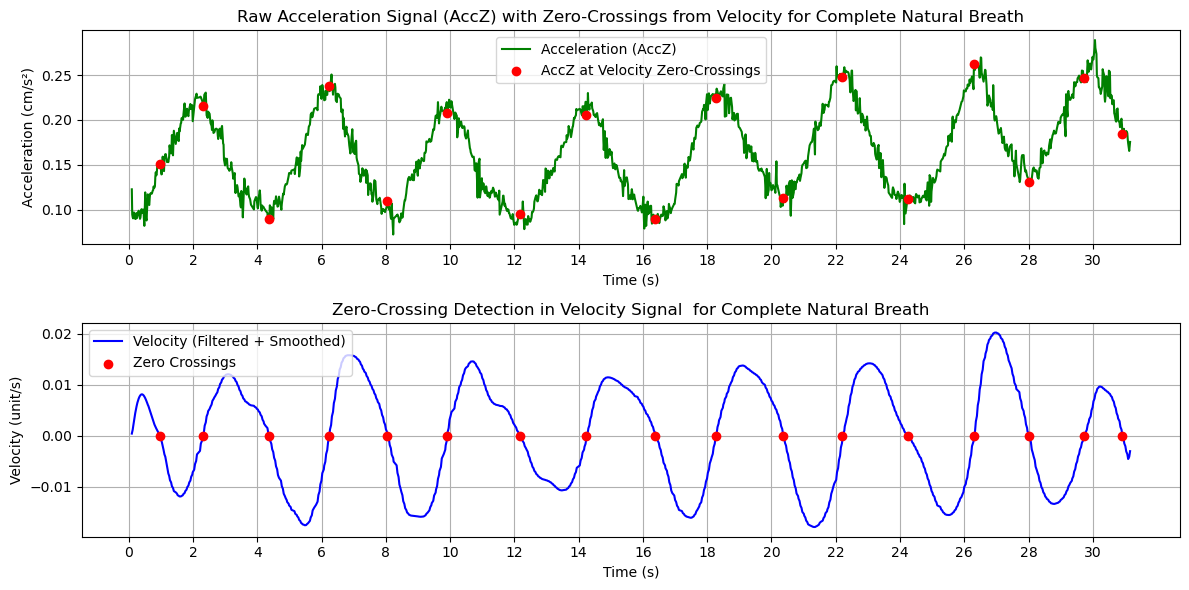

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
file_path = "chest_motion_data_ble_timer_01(natural_4_second).csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract time and AccZ acceleration
time = df["Timestamp_sec"].values
acceleration = df["AccZ"].values  # Use only AccZ

# Calculate time step (assumes uniform sampling)
dt = np.mean(np.diff(time))

# High-Pass Filter Function (removes drift)
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-Pass Filter Function (removes fast noise)
def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Moving Average Filter (stronger smoothing)
def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Compute velocity using cumulative sum and apply filters
velocity = np.cumsum(acceleration) * dt
velocity = highpass_filter(velocity, cutoff=0.3, fs=50)  
velocity = lowpass_filter(velocity, cutoff=2.2, fs=50)   
velocity = moving_average(velocity, window_size=7)       

# Find zero crossings in velocity
sign_changes = np.diff(np.sign(velocity))
valid_zero_crossings = np.where(sign_changes != 0)[0]
zero_crossing_times = time[valid_zero_crossings]

# Ignore zero crossings that occur within 1.0 seconds
filtered_zero_crossing_times = [zero_crossing_times[0]]
for i in range(1, len(zero_crossing_times)):
    if zero_crossing_times[i] - filtered_zero_crossing_times[-1] > 1.0:
        filtered_zero_crossing_times.append(zero_crossing_times[i])
filtered_zero_crossing_times = np.array(filtered_zero_crossing_times)

# Interpolate AccZ values at the time of zero crossings
acc_at_zero_crossings = np.interp(filtered_zero_crossing_times, time, acceleration)

# Compute time intervals between zero crossings
time_intervals = np.diff(filtered_zero_crossing_times)

# Estimate breathing rate
if len(time_intervals) > 1:
    avg_zero_crossing_time = np.mean(time_intervals)
    breathing_rate = 60 / (2 * avg_zero_crossing_time)  
else:
    avg_zero_crossing_time = np.nan
    breathing_rate = np.nan

# Store results
results = {
    "Zero Crossings": len(filtered_zero_crossing_times),
    "Avg Zero-Crossing Interval (s)": avg_zero_crossing_time,
    "Estimated Breathing Rate (BPM)": breathing_rate,
}

# Display results
print("\nZero-Crossing Analysis Results:")
print(pd.DataFrame([results]))

# Peak Detection Method
peaks, _ = find_peaks(velocity, distance=50, height=np.std(velocity))
peak_times = time[peaks]
breathing_rate_peaks = 60 / np.median(np.diff(peak_times)) if len(peak_times) > 1 else np.nan
print(f"Breathing Rate from Peak Detection: {breathing_rate_peaks:.2f} BPM")

# Plot acceleration and velocity
plt.figure(figsize=(12, 6))

# Plot raw acceleration with zero-crossings marked
plt.subplot(2, 1, 1)
plt.plot(time, acceleration, label="Acceleration (AccZ)", color="green")
plt.scatter(filtered_zero_crossing_times, acc_at_zero_crossings, color="red", label="AccZ at Velocity Zero-Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.title("Raw Acceleration Signal (AccZ) with Zero-Crossings from Velocity for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

# Plot velocity with zero-crossings marked
plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (Filtered + Smoothed)", color="blue")
plt.scatter(filtered_zero_crossing_times, np.zeros_like(filtered_zero_crossing_times), color="red", label="Zero Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.title("Zero-Crossing Detection in Velocity Signal  for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

plt.tight_layout()
plt.show()


In [8]:
print(filtered_zero_crossing_times)

[ 0.959  2.3    4.374  6.234  8.047  9.907 12.173 14.24  16.387 18.26
 20.36  22.207 24.246 26.3   28.027 29.72  30.92 ]


# N4S 2


Zero-Crossing Analysis Results:
   Zero Crossings  Avg Zero-Crossing Interval (s)  \
0              20                        1.968842   

   Estimated Breathing Rate (BPM)  
0                       15.237382  
Breathing Rate from Peak Detection: 15.44 BPM


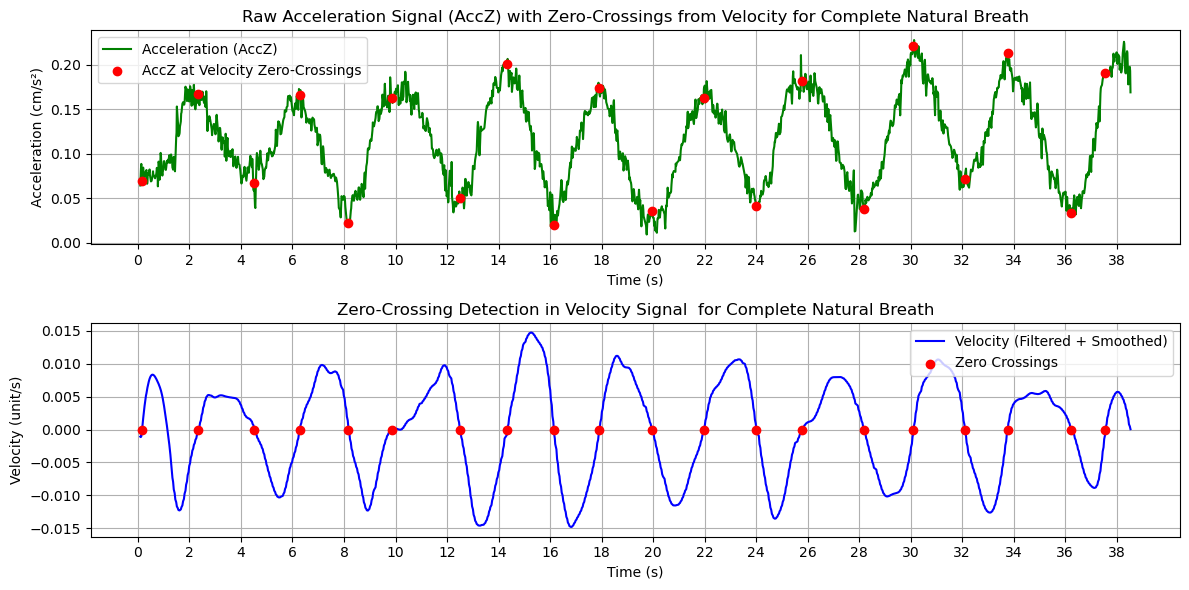

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
file_path = "chest_motion_data_ble_timer_02(natural_4_second).csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract time and AccZ acceleration
time = df["Timestamp_sec"].values
acceleration = df["AccZ"].values  # Use only AccZ

# Calculate time step (assumes uniform sampling)
dt = np.mean(np.diff(time))

# High-Pass Filter Function (removes drift)
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-Pass Filter Function (removes fast noise)
def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Moving Average Filter (stronger smoothing)
def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Compute velocity using cumulative sum and apply filters
velocity = np.cumsum(acceleration) * dt
velocity = highpass_filter(velocity, cutoff=0.3, fs=50)  
velocity = lowpass_filter(velocity, cutoff=2.2, fs=50)   
velocity = moving_average(velocity, window_size=7)       

# Find zero crossings in velocity
sign_changes = np.diff(np.sign(velocity))
valid_zero_crossings = np.where(sign_changes != 0)[0]
zero_crossing_times = time[valid_zero_crossings]

# Ignore zero crossings that occur within 1.0 seconds
filtered_zero_crossing_times = [zero_crossing_times[0]]
for i in range(1, len(zero_crossing_times)):
    if zero_crossing_times[i] - filtered_zero_crossing_times[-1] > 1.0:
        filtered_zero_crossing_times.append(zero_crossing_times[i])
filtered_zero_crossing_times = np.array(filtered_zero_crossing_times)

# Interpolate AccZ values at the time of zero crossings
acc_at_zero_crossings = np.interp(filtered_zero_crossing_times, time, acceleration)

# Compute time intervals between zero crossings
time_intervals = np.diff(filtered_zero_crossing_times)

# Estimate breathing rate
if len(time_intervals) > 1:
    avg_zero_crossing_time = np.mean(time_intervals)
    breathing_rate = 60 / (2 * avg_zero_crossing_time)  
else:
    avg_zero_crossing_time = np.nan
    breathing_rate = np.nan

# Store results
results = {
    "Zero Crossings": len(filtered_zero_crossing_times),
    "Avg Zero-Crossing Interval (s)": avg_zero_crossing_time,
    "Estimated Breathing Rate (BPM)": breathing_rate,
}

# Display results
print("\nZero-Crossing Analysis Results:")
print(pd.DataFrame([results]))

# Peak Detection Method
peaks, _ = find_peaks(velocity, distance=50, height=np.std(velocity))
peak_times = time[peaks]
breathing_rate_peaks = 60 / np.median(np.diff(peak_times)) if len(peak_times) > 1 else np.nan
print(f"Breathing Rate from Peak Detection: {breathing_rate_peaks:.2f} BPM")

# Plot acceleration and velocity
plt.figure(figsize=(12, 6))

# Plot raw acceleration with zero-crossings marked
plt.subplot(2, 1, 1)
plt.plot(time, acceleration, label="Acceleration (AccZ)", color="green")
plt.scatter(filtered_zero_crossing_times, acc_at_zero_crossings, color="red", label="AccZ at Velocity Zero-Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.title("Raw Acceleration Signal (AccZ) with Zero-Crossings from Velocity for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

# Plot velocity with zero-crossings marked
plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (Filtered + Smoothed)", color="blue")
plt.scatter(filtered_zero_crossing_times, np.zeros_like(filtered_zero_crossing_times), color="red", label="Zero Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.title("Zero-Crossing Detection in Velocity Signal  for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

plt.tight_layout()
plt.show()


In [10]:
print(filtered_zero_crossing_times)

[ 0.151  2.339  4.512  6.286  8.172  9.852 12.492 14.339 16.139 17.892
 19.965 21.959 23.999 25.785 28.185 30.106 32.099 33.766 36.226 37.559]


# N4S 3


Zero-Crossing Analysis Results:
   Zero Crossings  Avg Zero-Crossing Interval (s)  \
0              21                         1.76085   

   Estimated Breathing Rate (BPM)  
0                       17.037226  
Breathing Rate from Peak Detection: 15.87 BPM


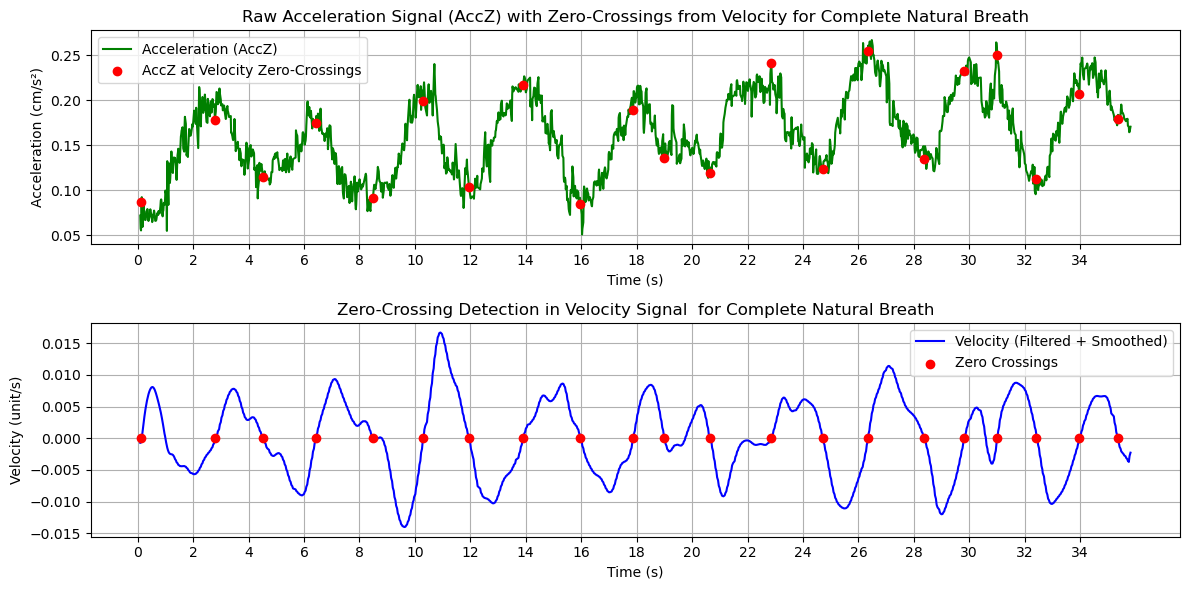

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
file_path = "chest_motion_data_ble_timer_03(natural_4_second).csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract time and AccZ acceleration
time = df["Timestamp_sec"].values
acceleration = df["AccZ"].values  # Use only AccZ

# Calculate time step (assumes uniform sampling)
dt = np.mean(np.diff(time))

# High-Pass Filter Function (removes drift)
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-Pass Filter Function (removes fast noise)
def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Moving Average Filter (stronger smoothing)
def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Compute velocity using cumulative sum and apply filters
velocity = np.cumsum(acceleration) * dt
velocity = highpass_filter(velocity, cutoff=0.3, fs=50)  
velocity = lowpass_filter(velocity, cutoff=2.2, fs=50)   
velocity = moving_average(velocity, window_size=7)       

# Find zero crossings in velocity
sign_changes = np.diff(np.sign(velocity))
valid_zero_crossings = np.where(sign_changes != 0)[0]
zero_crossing_times = time[valid_zero_crossings]

# Ignore zero crossings that occur within 1.0 seconds
filtered_zero_crossing_times = [zero_crossing_times[0]]
for i in range(1, len(zero_crossing_times)):
    if zero_crossing_times[i] - filtered_zero_crossing_times[-1] > 1.0:
        filtered_zero_crossing_times.append(zero_crossing_times[i])
filtered_zero_crossing_times = np.array(filtered_zero_crossing_times)

# Interpolate AccZ values at the time of zero crossings
acc_at_zero_crossings = np.interp(filtered_zero_crossing_times, time, acceleration)

# Compute time intervals between zero crossings
time_intervals = np.diff(filtered_zero_crossing_times)

# Estimate breathing rate
if len(time_intervals) > 1:
    avg_zero_crossing_time = np.mean(time_intervals)
    breathing_rate = 60 / (2 * avg_zero_crossing_time)  
else:
    avg_zero_crossing_time = np.nan
    breathing_rate = np.nan

# Store results
results = {
    "Zero Crossings": len(filtered_zero_crossing_times),
    "Avg Zero-Crossing Interval (s)": avg_zero_crossing_time,
    "Estimated Breathing Rate (BPM)": breathing_rate,
}

# Display results
print("\nZero-Crossing Analysis Results:")
print(pd.DataFrame([results]))

# Peak Detection Method
peaks, _ = find_peaks(velocity, distance=50, height=np.std(velocity))
peak_times = time[peaks]
breathing_rate_peaks = 60 / np.median(np.diff(peak_times)) if len(peak_times) > 1 else np.nan
print(f"Breathing Rate from Peak Detection: {breathing_rate_peaks:.2f} BPM")

# Plot acceleration and velocity
plt.figure(figsize=(12, 6))

# Plot raw acceleration with zero-crossings marked
plt.subplot(2, 1, 1)
plt.plot(time, acceleration, label="Acceleration (AccZ)", color="green")
plt.scatter(filtered_zero_crossing_times, acc_at_zero_crossings, color="red", label="AccZ at Velocity Zero-Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.title("Raw Acceleration Signal (AccZ) with Zero-Crossings from Velocity for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

# Plot velocity with zero-crossings marked
plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (Filtered + Smoothed)", color="blue")
plt.scatter(filtered_zero_crossing_times, np.zeros_like(filtered_zero_crossing_times), color="red", label="Zero Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.title("Zero-Crossing Detection in Velocity Signal  for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

plt.tight_layout()
plt.show()


In [12]:
print(filtered_zero_crossing_times)

[ 0.132  2.782  4.509  6.416  8.482 10.282 11.949 13.882 15.969 17.876
 18.983 20.636 22.856 24.716 26.336 28.376 29.816 31.016 32.423 33.969
 35.349]


# HND 1


Zero-Crossing Analysis Results:
   Zero Crossings  Avg Zero-Crossing Interval (s)  \
0              25                        1.457583   

   Estimated Breathing Rate (BPM)  
0                       20.582014  
Breathing Rate from Peak Detection: 20.42 BPM


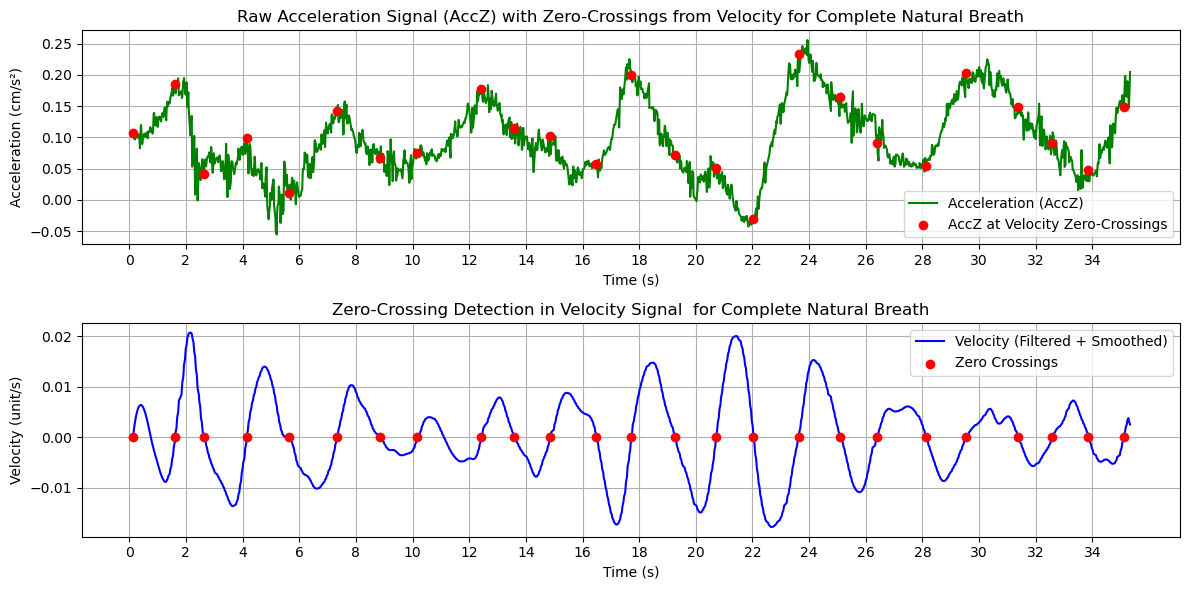

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
file_path = "chest_motion_data_ble_timer_01(heavy_no_duration).csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract time and AccZ acceleration
time = df["Timestamp_sec"].values
acceleration = df["AccZ"].values  # Use only AccZ

# Calculate time step (assumes uniform sampling)
dt = np.mean(np.diff(time))

# High-Pass Filter Function (removes drift)
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-Pass Filter Function (removes fast noise)
def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Moving Average Filter (stronger smoothing)
def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Compute velocity using cumulative sum and apply filters
velocity = np.cumsum(acceleration) * dt
velocity = highpass_filter(velocity, cutoff=0.3, fs=50)  
velocity = lowpass_filter(velocity, cutoff=2.2, fs=50)   
velocity = moving_average(velocity, window_size=7)       

# Find zero crossings in velocity
sign_changes = np.diff(np.sign(velocity))
valid_zero_crossings = np.where(sign_changes != 0)[0]
zero_crossing_times = time[valid_zero_crossings]

# Ignore zero crossings that occur within 1.0 seconds
filtered_zero_crossing_times = [zero_crossing_times[0]]
for i in range(1, len(zero_crossing_times)):
    if zero_crossing_times[i] - filtered_zero_crossing_times[-1] > 1.0:
        filtered_zero_crossing_times.append(zero_crossing_times[i])
filtered_zero_crossing_times = np.array(filtered_zero_crossing_times)

# Interpolate AccZ values at the time of zero crossings
acc_at_zero_crossings = np.interp(filtered_zero_crossing_times, time, acceleration)

# Compute time intervals between zero crossings
time_intervals = np.diff(filtered_zero_crossing_times)

# Estimate breathing rate
if len(time_intervals) > 1:
    avg_zero_crossing_time = np.mean(time_intervals)
    breathing_rate = 60 / (2 * avg_zero_crossing_time)  
else:
    avg_zero_crossing_time = np.nan
    breathing_rate = np.nan

# Store results
results = {
    "Zero Crossings": len(filtered_zero_crossing_times),
    "Avg Zero-Crossing Interval (s)": avg_zero_crossing_time,
    "Estimated Breathing Rate (BPM)": breathing_rate,
}

# Display results
print("\nZero-Crossing Analysis Results:")
print(pd.DataFrame([results]))

# Peak Detection Method
peaks, _ = find_peaks(velocity, distance=50, height=np.std(velocity))
peak_times = time[peaks]
breathing_rate_peaks = 60 / np.median(np.diff(peak_times)) if len(peak_times) > 1 else np.nan
print(f"Breathing Rate from Peak Detection: {breathing_rate_peaks:.2f} BPM")

# Plot acceleration and velocity
plt.figure(figsize=(12, 6))

# Plot raw acceleration with zero-crossings marked
plt.subplot(2, 1, 1)
plt.plot(time, acceleration, label="Acceleration (AccZ)", color="green")
plt.scatter(filtered_zero_crossing_times, acc_at_zero_crossings, color="red", label="AccZ at Velocity Zero-Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.title("Raw Acceleration Signal (AccZ) with Zero-Crossings from Velocity for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

# Plot velocity with zero-crossings marked
plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (Filtered + Smoothed)", color="blue")
plt.scatter(filtered_zero_crossing_times, np.zeros_like(filtered_zero_crossing_times), color="red", label="Zero Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.title("Zero-Crossing Detection in Velocity Signal  for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

plt.tight_layout()
plt.show()


In [14]:
print(filtered_zero_crossing_times)

[ 0.119  1.621  2.627  4.141  5.628  7.321  8.868 10.154 12.421 13.574
 14.868 16.488 17.715 19.261 20.701 22.021 23.628 25.081 26.388 28.128
 29.521 31.381 32.581 33.855 35.101]


# HND 2


Zero-Crossing Analysis Results:
   Zero Crossings  Avg Zero-Crossing Interval (s)  \
0              20                        1.509474   

   Estimated Breathing Rate (BPM)  
0                       19.874477  
Breathing Rate from Peak Detection: 13.63 BPM


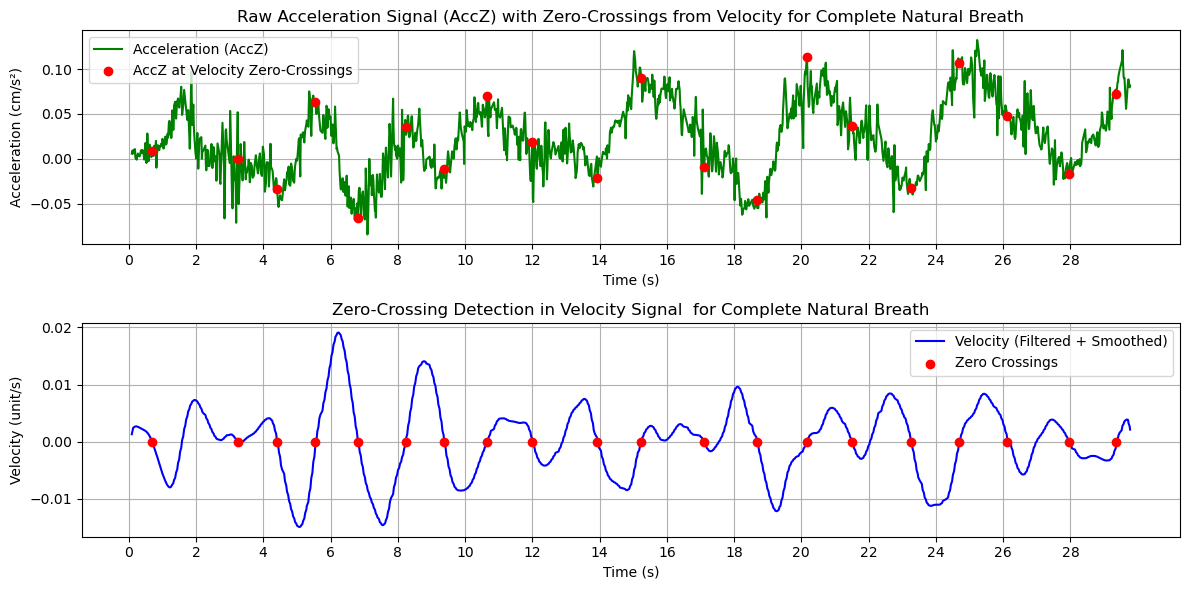

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
file_path = "chest_motion_data_ble_timer_02(heavy_no_duration).csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract time and AccZ acceleration
time = df["Timestamp_sec"].values
acceleration = df["AccZ"].values  # Use only AccZ

# Calculate time step (assumes uniform sampling)
dt = np.mean(np.diff(time))

# High-Pass Filter Function (removes drift)
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-Pass Filter Function (removes fast noise)
def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Moving Average Filter (stronger smoothing)
def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Compute velocity using cumulative sum and apply filters
velocity = np.cumsum(acceleration) * dt
velocity = highpass_filter(velocity, cutoff=0.3, fs=50)  
velocity = lowpass_filter(velocity, cutoff=2.2, fs=50)   
velocity = moving_average(velocity, window_size=7)       

# Find zero crossings in velocity
sign_changes = np.diff(np.sign(velocity))
valid_zero_crossings = np.where(sign_changes != 0)[0]
zero_crossing_times = time[valid_zero_crossings]

# Ignore zero crossings that occur within 1.0 seconds
filtered_zero_crossing_times = [zero_crossing_times[0]]
for i in range(1, len(zero_crossing_times)):
    if zero_crossing_times[i] - filtered_zero_crossing_times[-1] > 1.0:
        filtered_zero_crossing_times.append(zero_crossing_times[i])
filtered_zero_crossing_times = np.array(filtered_zero_crossing_times)

# Interpolate AccZ values at the time of zero crossings
acc_at_zero_crossings = np.interp(filtered_zero_crossing_times, time, acceleration)

# Compute time intervals between zero crossings
time_intervals = np.diff(filtered_zero_crossing_times)

# Estimate breathing rate
if len(time_intervals) > 1:
    avg_zero_crossing_time = np.mean(time_intervals)
    breathing_rate = 60 / (2 * avg_zero_crossing_time)  
else:
    avg_zero_crossing_time = np.nan
    breathing_rate = np.nan

# Store results
results = {
    "Zero Crossings": len(filtered_zero_crossing_times),
    "Avg Zero-Crossing Interval (s)": avg_zero_crossing_time,
    "Estimated Breathing Rate (BPM)": breathing_rate,
}

# Display results
print("\nZero-Crossing Analysis Results:")
print(pd.DataFrame([results]))

# Peak Detection Method
peaks, _ = find_peaks(velocity, distance=50, height=np.std(velocity))
peak_times = time[peaks]
breathing_rate_peaks = 60 / np.median(np.diff(peak_times)) if len(peak_times) > 1 else np.nan
print(f"Breathing Rate from Peak Detection: {breathing_rate_peaks:.2f} BPM")

# Plot acceleration and velocity
plt.figure(figsize=(12, 6))

# Plot raw acceleration with zero-crossings marked
plt.subplot(2, 1, 1)
plt.plot(time, acceleration, label="Acceleration (AccZ)", color="green")
plt.scatter(filtered_zero_crossing_times, acc_at_zero_crossings, color="red", label="AccZ at Velocity Zero-Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.title("Raw Acceleration Signal (AccZ) with Zero-Crossings from Velocity for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

# Plot velocity with zero-crossings marked
plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (Filtered + Smoothed)", color="blue")
plt.scatter(filtered_zero_crossing_times, np.zeros_like(filtered_zero_crossing_times), color="red", label="Zero Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.title("Zero-Crossing Detection in Velocity Signal  for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

plt.tight_layout()
plt.show()


In [18]:
print(filtered_zero_crossing_times)

[ 0.321  2.173  4.006  5.265  6.646  9.046 11.459 12.913 14.293 16.186
 17.833 19.139 21.179 22.186 23.473 25.559 27.433 28.966 30.539 32.446
 34.426]


# HND 3


Zero-Crossing Analysis Results:
   Zero Crossings  Avg Zero-Crossing Interval (s)  \
0              20                        1.726632   

   Estimated Breathing Rate (BPM)  
0                        17.37487  
Breathing Rate from Peak Detection: 16.62 BPM


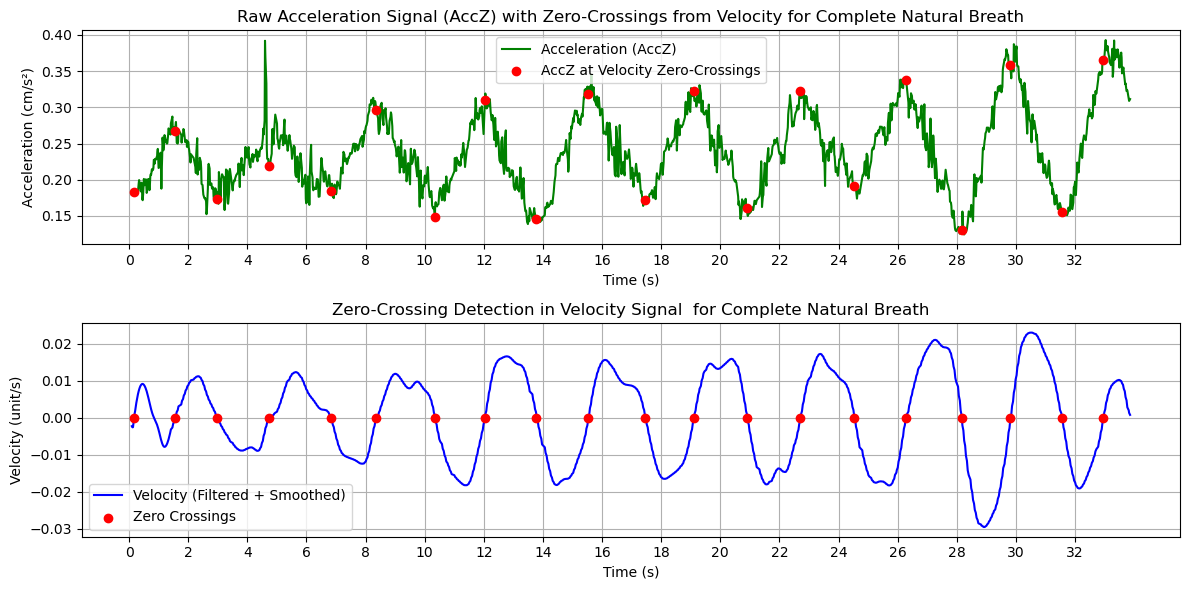

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
file_path = "chest_motion_data_ble_timer_03(heavy_no_duration).csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract time and AccZ acceleration
time = df["Timestamp_sec"].values
acceleration = df["AccZ"].values  # Use only AccZ

# Calculate time step (assumes uniform sampling)
dt = np.mean(np.diff(time))

# High-Pass Filter Function (removes drift)
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-Pass Filter Function (removes fast noise)
def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Moving Average Filter (stronger smoothing)
def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Compute velocity using cumulative sum and apply filters
velocity = np.cumsum(acceleration) * dt
velocity = highpass_filter(velocity, cutoff=0.3, fs=50)  
velocity = lowpass_filter(velocity, cutoff=2.2, fs=50)   
velocity = moving_average(velocity, window_size=7)       

# Find zero crossings in velocity
sign_changes = np.diff(np.sign(velocity))
valid_zero_crossings = np.where(sign_changes != 0)[0]
zero_crossing_times = time[valid_zero_crossings]

# Ignore zero crossings that occur within 1.0 seconds
filtered_zero_crossing_times = [zero_crossing_times[0]]
for i in range(1, len(zero_crossing_times)):
    if zero_crossing_times[i] - filtered_zero_crossing_times[-1] > 1.0:
        filtered_zero_crossing_times.append(zero_crossing_times[i])
filtered_zero_crossing_times = np.array(filtered_zero_crossing_times)

# Interpolate AccZ values at the time of zero crossings
acc_at_zero_crossings = np.interp(filtered_zero_crossing_times, time, acceleration)

# Compute time intervals between zero crossings
time_intervals = np.diff(filtered_zero_crossing_times)

# Estimate breathing rate
if len(time_intervals) > 1:
    avg_zero_crossing_time = np.mean(time_intervals)
    breathing_rate = 60 / (2 * avg_zero_crossing_time)  
else:
    avg_zero_crossing_time = np.nan
    breathing_rate = np.nan

# Store results
results = {
    "Zero Crossings": len(filtered_zero_crossing_times),
    "Avg Zero-Crossing Interval (s)": avg_zero_crossing_time,
    "Estimated Breathing Rate (BPM)": breathing_rate,
}

# Display results
print("\nZero-Crossing Analysis Results:")
print(pd.DataFrame([results]))

# Peak Detection Method
peaks, _ = find_peaks(velocity, distance=50, height=np.std(velocity))
peak_times = time[peaks]
breathing_rate_peaks = 60 / np.median(np.diff(peak_times)) if len(peak_times) > 1 else np.nan
print(f"Breathing Rate from Peak Detection: {breathing_rate_peaks:.2f} BPM")

# Plot acceleration and velocity
plt.figure(figsize=(12, 6))

# Plot raw acceleration with zero-crossings marked
plt.subplot(2, 1, 1)
plt.plot(time, acceleration, label="Acceleration (AccZ)", color="green")
plt.scatter(filtered_zero_crossing_times, acc_at_zero_crossings, color="red", label="AccZ at Velocity Zero-Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.title("Raw Acceleration Signal (AccZ) with Zero-Crossings from Velocity for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

# Plot velocity with zero-crossings marked
plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (Filtered + Smoothed)", color="blue")
plt.scatter(filtered_zero_crossing_times, np.zeros_like(filtered_zero_crossing_times), color="red", label="Zero Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.title("Zero-Crossing Detection in Velocity Signal  for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

plt.tight_layout()
plt.show()


In [20]:
print(filtered_zero_crossing_times)

[ 0.158  1.551  2.977  4.73   6.817  8.364 10.344 12.037 13.777 15.531
 17.451 19.104 20.904 22.704 24.531 26.271 28.164 29.811 31.551 32.964]


# CN 1


Zero-Crossing Analysis Results:
   Zero Crossings  Avg Zero-Crossing Interval (s)  \
0              21                          1.9956   

   Estimated Breathing Rate (BPM)  
0                       15.033073  
Breathing Rate from Peak Detection: 15.10 BPM


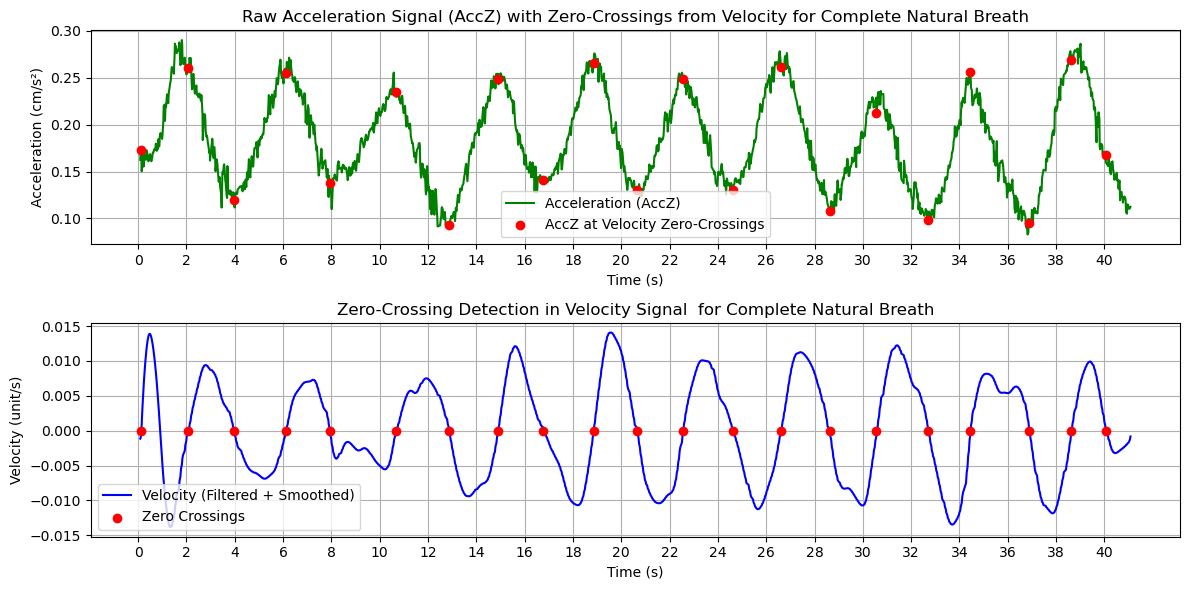

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
file_path = "chest_motion_data_ble_timer_01(complete_natural).csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract time and AccZ acceleration
time = df["Timestamp_sec"].values
acceleration = df["AccZ"].values  # Use only AccZ

# Calculate time step (assumes uniform sampling)
dt = np.mean(np.diff(time))

# High-Pass Filter Function (removes drift)
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-Pass Filter Function (removes fast noise)
def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Moving Average Filter (stronger smoothing)
def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Compute velocity using cumulative sum and apply filters
velocity = np.cumsum(acceleration) * dt
velocity = highpass_filter(velocity, cutoff=0.3, fs=50)  
velocity = lowpass_filter(velocity, cutoff=2.2, fs=50)   
velocity = moving_average(velocity, window_size=7)       

# Find zero crossings in velocity
sign_changes = np.diff(np.sign(velocity))
valid_zero_crossings = np.where(sign_changes != 0)[0]
zero_crossing_times = time[valid_zero_crossings]

# Ignore zero crossings that occur within 1.0 seconds
filtered_zero_crossing_times = [zero_crossing_times[0]]
for i in range(1, len(zero_crossing_times)):
    if zero_crossing_times[i] - filtered_zero_crossing_times[-1] > 1.0:
        filtered_zero_crossing_times.append(zero_crossing_times[i])
filtered_zero_crossing_times = np.array(filtered_zero_crossing_times)

# Interpolate AccZ values at the time of zero crossings
acc_at_zero_crossings = np.interp(filtered_zero_crossing_times, time, acceleration)

# Compute time intervals between zero crossings
time_intervals = np.diff(filtered_zero_crossing_times)

# Estimate breathing rate
if len(time_intervals) > 1:
    avg_zero_crossing_time = np.mean(time_intervals)
    breathing_rate = 60 / (2 * avg_zero_crossing_time)  
else:
    avg_zero_crossing_time = np.nan
    breathing_rate = np.nan

# Store results
results = {
    "Zero Crossings": len(filtered_zero_crossing_times),
    "Avg Zero-Crossing Interval (s)": avg_zero_crossing_time,
    "Estimated Breathing Rate (BPM)": breathing_rate,
}

# Display results
print("\nZero-Crossing Analysis Results:")
print(pd.DataFrame([results]))

# Peak Detection Method
peaks, _ = find_peaks(velocity, distance=50, height=np.std(velocity))
peak_times = time[peaks]
breathing_rate_peaks = 60 / np.median(np.diff(peak_times)) if len(peak_times) > 1 else np.nan
print(f"Breathing Rate from Peak Detection: {breathing_rate_peaks:.2f} BPM")

# Plot acceleration and velocity
plt.figure(figsize=(12, 6))

# Plot raw acceleration with zero-crossings marked
plt.subplot(2, 1, 1)
plt.plot(time, acceleration, label="Acceleration (AccZ)", color="green")
plt.scatter(filtered_zero_crossing_times, acc_at_zero_crossings, color="red", label="AccZ at Velocity Zero-Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.title("Raw Acceleration Signal (AccZ) with Zero-Crossings from Velocity for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

# Plot velocity with zero-crossings marked
plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (Filtered + Smoothed)", color="blue")
plt.scatter(filtered_zero_crossing_times, np.zeros_like(filtered_zero_crossing_times), color="red", label="Zero Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.title("Zero-Crossing Detection in Velocity Signal  for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

plt.tight_layout()
plt.show()


In [22]:
print(filtered_zero_crossing_times)

[ 0.133  2.052  3.972  6.132  7.932 10.659 12.866 14.906 16.778 18.852
 20.651 22.572 24.626 26.605 28.631 30.565 32.712 34.452 36.879 38.619
 40.045]


# CN 2


Zero-Crossing Analysis Results:
   Zero Crossings  Avg Zero-Crossing Interval (s)  \
0              23                        1.844545   

   Estimated Breathing Rate (BPM)  
0                        16.26417  
Breathing Rate from Peak Detection: 15.93 BPM


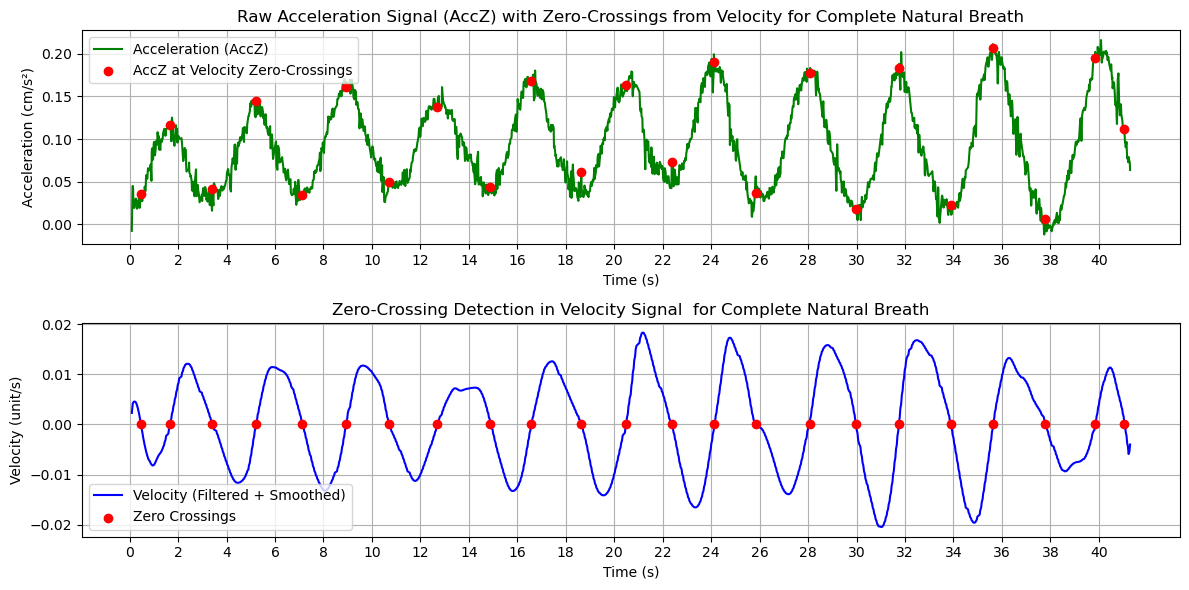

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
file_path = "chest_motion_data_ble_timer_02(complete_natural).csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract time and AccZ acceleration
time = df["Timestamp_sec"].values
acceleration = df["AccZ"].values  # Use only AccZ

# Calculate time step (assumes uniform sampling)
dt = np.mean(np.diff(time))

# High-Pass Filter Function (removes drift)
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-Pass Filter Function (removes fast noise)
def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Moving Average Filter (stronger smoothing)
def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Compute velocity using cumulative sum and apply filters
velocity = np.cumsum(acceleration) * dt
velocity = highpass_filter(velocity, cutoff=0.3, fs=50)  
velocity = lowpass_filter(velocity, cutoff=2.2, fs=50)   
velocity = moving_average(velocity, window_size=7)       

# Find zero crossings in velocity
sign_changes = np.diff(np.sign(velocity))
valid_zero_crossings = np.where(sign_changes != 0)[0]
zero_crossing_times = time[valid_zero_crossings]

# Ignore zero crossings that occur within 1.0 seconds
filtered_zero_crossing_times = [zero_crossing_times[0]]
for i in range(1, len(zero_crossing_times)):
    if zero_crossing_times[i] - filtered_zero_crossing_times[-1] > 1.0:
        filtered_zero_crossing_times.append(zero_crossing_times[i])
filtered_zero_crossing_times = np.array(filtered_zero_crossing_times)

# Interpolate AccZ values at the time of zero crossings
acc_at_zero_crossings = np.interp(filtered_zero_crossing_times, time, acceleration)

# Compute time intervals between zero crossings
time_intervals = np.diff(filtered_zero_crossing_times)

# Estimate breathing rate
if len(time_intervals) > 1:
    avg_zero_crossing_time = np.mean(time_intervals)
    breathing_rate = 60 / (2 * avg_zero_crossing_time)  
else:
    avg_zero_crossing_time = np.nan
    breathing_rate = np.nan

# Store results
results = {
    "Zero Crossings": len(filtered_zero_crossing_times),
    "Avg Zero-Crossing Interval (s)": avg_zero_crossing_time,
    "Estimated Breathing Rate (BPM)": breathing_rate,
}

# Display results
print("\nZero-Crossing Analysis Results:")
print(pd.DataFrame([results]))

# Peak Detection Method
peaks, _ = find_peaks(velocity, distance=50, height=np.std(velocity))
peak_times = time[peaks]
breathing_rate_peaks = 60 / np.median(np.diff(peak_times)) if len(peak_times) > 1 else np.nan
print(f"Breathing Rate from Peak Detection: {breathing_rate_peaks:.2f} BPM")

# Plot acceleration and velocity
plt.figure(figsize=(12, 6))

# Plot raw acceleration with zero-crossings marked
plt.subplot(2, 1, 1)
plt.plot(time, acceleration, label="Acceleration (AccZ)", color="green")
plt.scatter(filtered_zero_crossing_times, acc_at_zero_crossings, color="red", label="AccZ at Velocity Zero-Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.title("Raw Acceleration Signal (AccZ) with Zero-Crossings from Velocity for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

# Plot velocity with zero-crossings marked
plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (Filtered + Smoothed)", color="blue")
plt.scatter(filtered_zero_crossing_times, np.zeros_like(filtered_zero_crossing_times), color="red", label="Zero Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.title("Zero-Crossing Detection in Velocity Signal  for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

plt.tight_layout()
plt.show()


In [24]:
print(filtered_zero_crossing_times)

[ 0.469  1.661  3.415  5.215  7.135  8.935 10.688 12.701 14.888 16.568
 18.642 20.468 22.375 24.129 25.854 28.061 29.982 31.735 33.882 35.635
 37.795 39.835 41.049]


# CN 3


Zero-Crossing Analysis Results:
   Zero Crossings  Avg Zero-Crossing Interval (s)  \
0              18                        1.749176   

   Estimated Breathing Rate (BPM)  
0                       17.150928  
Breathing Rate from Peak Detection: 16.67 BPM


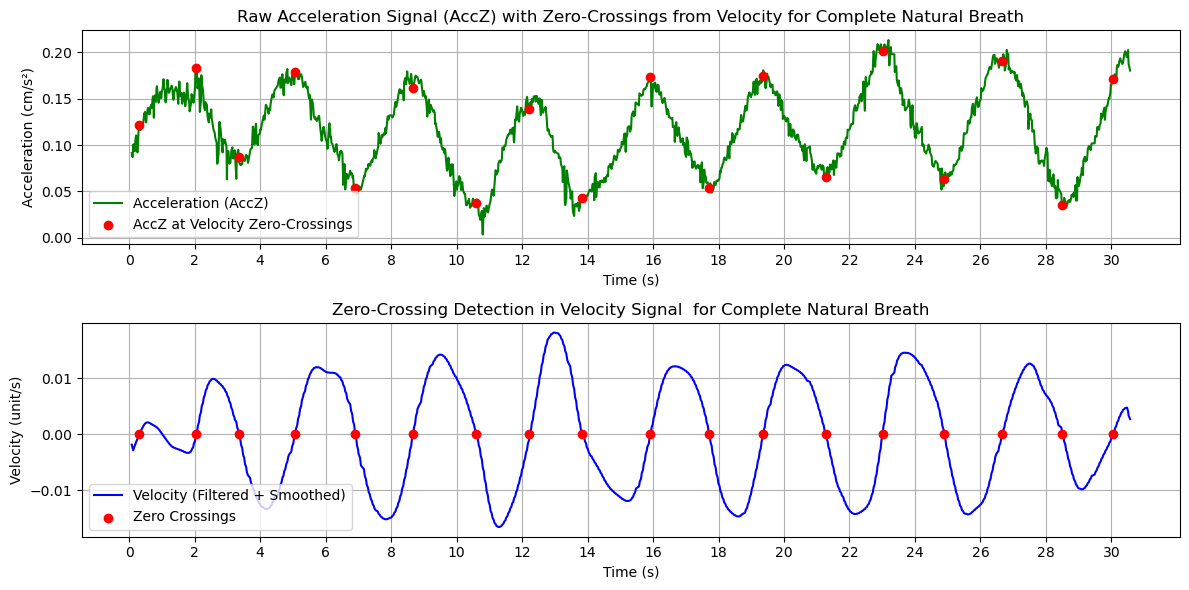

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
file_path = "chest_motion_data_ble_timer_03(complete_natural).csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract time and AccZ acceleration
time = df["Timestamp_sec"].values
acceleration = df["AccZ"].values  # Use only AccZ

# Calculate time step (assumes uniform sampling)
dt = np.mean(np.diff(time))

# High-Pass Filter Function (removes drift)
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Low-Pass Filter Function (removes fast noise)
def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Moving Average Filter (stronger smoothing)
def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Compute velocity using cumulative sum and apply filters
velocity = np.cumsum(acceleration) * dt
velocity = highpass_filter(velocity, cutoff=0.3, fs=50)  
velocity = lowpass_filter(velocity, cutoff=2.2, fs=50)   
velocity = moving_average(velocity, window_size=7)       

# Find zero crossings in velocity
sign_changes = np.diff(np.sign(velocity))
valid_zero_crossings = np.where(sign_changes != 0)[0]
zero_crossing_times = time[valid_zero_crossings]

# Ignore zero crossings that occur within 1.0 seconds
filtered_zero_crossing_times = [zero_crossing_times[0]]
for i in range(1, len(zero_crossing_times)):
    if zero_crossing_times[i] - filtered_zero_crossing_times[-1] > 1.0:
        filtered_zero_crossing_times.append(zero_crossing_times[i])
filtered_zero_crossing_times = np.array(filtered_zero_crossing_times)

# Interpolate AccZ values at the time of zero crossings
acc_at_zero_crossings = np.interp(filtered_zero_crossing_times, time, acceleration)

# Compute time intervals between zero crossings
time_intervals = np.diff(filtered_zero_crossing_times)

# Estimate breathing rate
if len(time_intervals) > 1:
    avg_zero_crossing_time = np.mean(time_intervals)
    breathing_rate = 60 / (2 * avg_zero_crossing_time)  
else:
    avg_zero_crossing_time = np.nan
    breathing_rate = np.nan

# Store results
results = {
    "Zero Crossings": len(filtered_zero_crossing_times),
    "Avg Zero-Crossing Interval (s)": avg_zero_crossing_time,
    "Estimated Breathing Rate (BPM)": breathing_rate,
}

# Display results
print("\nZero-Crossing Analysis Results:")
print(pd.DataFrame([results]))

# Peak Detection Method
peaks, _ = find_peaks(velocity, distance=50, height=np.std(velocity))
peak_times = time[peaks]
breathing_rate_peaks = 60 / np.median(np.diff(peak_times)) if len(peak_times) > 1 else np.nan
print(f"Breathing Rate from Peak Detection: {breathing_rate_peaks:.2f} BPM")

# Plot acceleration and velocity
plt.figure(figsize=(12, 6))

# Plot raw acceleration with zero-crossings marked
plt.subplot(2, 1, 1)
plt.plot(time, acceleration, label="Acceleration (AccZ)", color="green")
plt.scatter(filtered_zero_crossing_times, acc_at_zero_crossings, color="red", label="AccZ at Velocity Zero-Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.title("Raw Acceleration Signal (AccZ) with Zero-Crossings from Velocity for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

# Plot velocity with zero-crossings marked
plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (Filtered + Smoothed)", color="blue")
plt.scatter(filtered_zero_crossing_times, np.zeros_like(filtered_zero_crossing_times), color="red", label="Zero Crossings", zorder=3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.title("Zero-Crossing Detection in Velocity Signal  for Complete Natural Breath")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(np.floor(min(time) // 2) * 2, np.ceil(max(time) // 2) * 2 + 1, 2))

plt.tight_layout()
plt.show()


In [26]:
print(filtered_zero_crossing_times)

[ 0.308  2.037  3.344  5.071  6.897  8.671 10.604 12.224 13.83  15.898
 17.697 19.351 21.271 23.011 24.884 26.671 28.498 30.044]
